<a href="https://colab.research.google.com/github/hufsaim/T10306201/blob/master/advanced/HW03_recon1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
d = sio.loadmat('kspace_2d_fft_5echo.mat')

In [3]:
kspace = d['kspace']
te = d['te']
print(te) # echo time (ms)
kspace.shape,te.shape

[[0.009]
 [0.018]
 [0.027]
 [0.036]
 [0.045]]


((320, 320, 10, 5), (5, 1))

In [4]:
Ns = 5
Ne = 2
F0 = kspace[:,:,Ns,Ne]
M0 = np.fft.fftshift(np.fft.fftn(np.fft.fftshift(F0)))
F=F0.copy()
F[::2] = 0
M = np.fft.fftshift(np.fft.fftn(np.fft.fftshift(F)))
del F0

## Q1.
- zero vector가 된 row들에 적당한 값을 채워 복원해보기
- 예시는 인접한 row값을 대입한 것으로, 각자의 방법으로 zero rows들을 채워 myF를 만들어 봅니다.
- F0는 없다고 가정하고, 원래의 값을 대입하면 안됩니다.

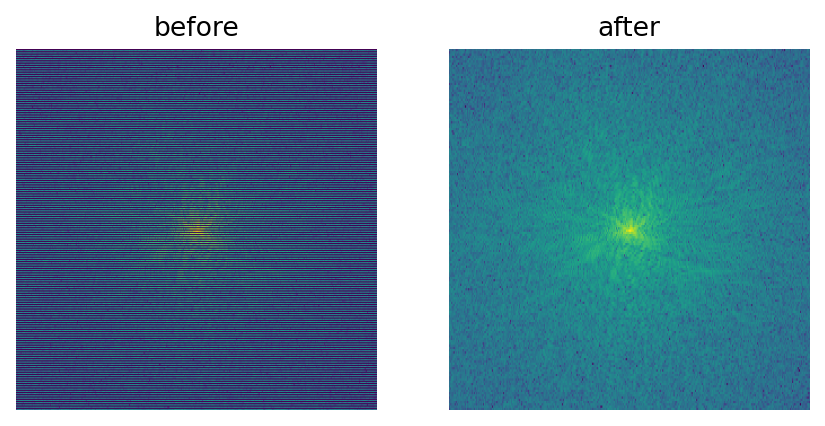

In [5]:
eps=1e-6
myF = F.copy()
plt.figure(dpi=160)
plt.subplot(121)
plt.imshow(np.log(np.abs(F)+eps))
plt.title('before')
plt.axis('off')

plt.subplot(122)
myF[::2,:] = F[1::2,:]
plt.imshow(np.log(np.abs(myF)+eps))
plt.title('after')
plt.axis('off')


plt.show()

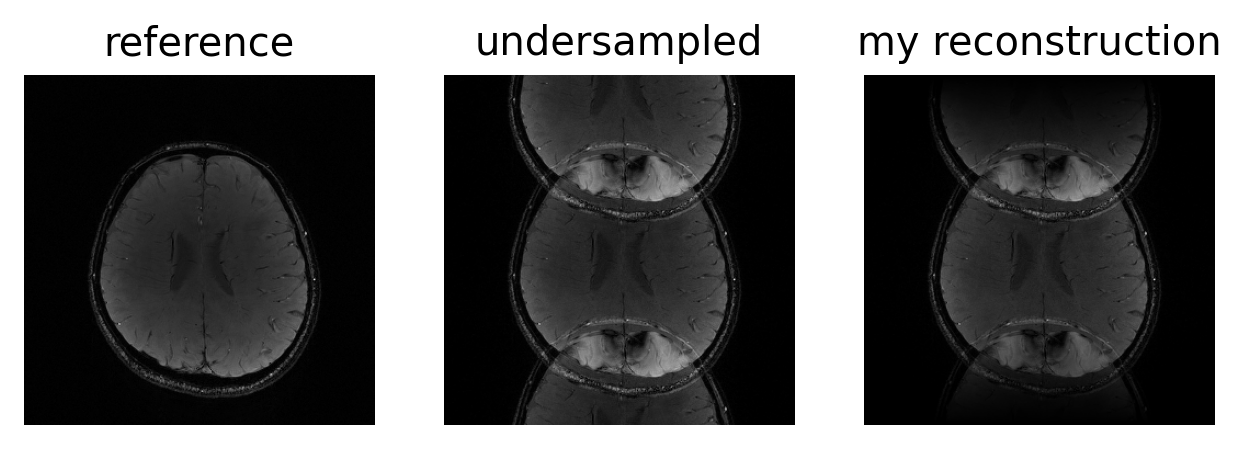

In [6]:
Mu = np.fft.fftshift(np.fft.fftn(np.fft.fftshift(F)))
M = np.fft.fftshift(np.fft.fftn(np.fft.fftshift(myF)))

plt.figure(dpi=240)
plt.subplot(131)
plt.imshow(np.abs(M0),cmap='gray')
plt.axis('off')
plt.title('reference')
plt.subplot(132)
plt.imshow(np.abs(Mu),cmap='gray')
plt.axis('off')
plt.title('undersampled')
plt.subplot(133)
plt.imshow(np.abs(M),cmap='gray')
plt.title('my reconstruction')
plt.axis('off')
plt.show()